# Multi-variate Rregression

Linear fit is often inadequate but higher-order polynomial fits often leads to overfitting i.e. learns spurious, flawed relationships between input and output
R-square fit can often be misleding measure in case of high-dimensional regression
Metamodel can be constructed by selectively discovering features (or their combination) which matter and shrinking other high-order terms towards zero
LASSO: Least Absolute Shrinkage and Selection Operator
 
 
 
 
Import libraries


https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Regression/Multi-variate%20LASSO%20regression%20with%20CV.ipynb
https://www.saedsayad.com/support_vector_machine_reg.htm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

### Multi-variate regression


### Prepare data

In [2]:
df = pd.read_csv("out1.csv")
df.head()
df["coords"]=list(zip(df["long"], df["lat"]))
df.pivot_table(index="coords",
               columns="band",
               values = "map_rescaled").head()

band,02,03,04,05,06,07,08,11,12,8A
coords,,,,,,,,,,
"(-5.54839898, 42.37787055)",0.1845,0.2251,0.2486,0.2987,0.3717,0.3943,0.4030,0.3723,0.3017,0.4088
"(-5.54799999, 42.37965659)",0.1978,0.2343,0.2706,0.3143,0.3766,0.3964,0.4002,0.4084,0.3445,0.4048
"(-5.54669242, 42.40362733)",0.1854,0.2335,0.2539,0.3159,0.4198,0.4494,0.4428,0.3950,0.3251,0.4586
"(-5.54636819, 42.40427712)",0.1808,0.2170,0.2383,0.2893,0.3858,0.4116,0.3833,0.3671,0.2912,0.4241
"(-5.54035797, 42.42232626)",0.1800,0.2242,0.2545,0.3083,0.3921,0.4134,0.4100,0.4110,0.3289,0.4312


In [3]:
import numpy as np

X = df.pivot_table(index="coords",
               columns="band",
               values = "map_rescaled",aggfunc=np.mean).values
'''X = (X_sin_normalizar-np.min(X_sin_normalizar))/(np.max(X_sin_normalizar)-np.min(X_sin_normalizar))'''

X

array([[0.06823593, 0.09585686, 0.11184434, ..., 0.19599973, 0.14796925,
        0.22083135],
       [0.07728417, 0.10211579, 0.12681135, ..., 0.22055922, 0.17708688,
        0.21811008],
       [0.06884822, 0.10157154, 0.11545003, ..., 0.21144296, 0.1638887 ,
        0.2547112 ],
       ...,
       [0.07422274, 0.09014219, 0.10524525, ..., 0.19756446, 0.15973876,
        0.17620246],
       [0.10742227, 0.14463569, 0.18627117, ..., 0.25062929, 0.21021838,
        0.2140962 ],
       [0.10646983, 0.14130213, 0.17817539, ..., 0.2412409 , 0.20538812,
        0.2153888 ]])

In [4]:
y = df.groupby("coords").mean()["read"].values
'''y = (y_sin_normalizar-np.min(y_sin_normalizar))/(np.max(y_sin_normalizar)-np.min(y_sin_normalizar))'''
y

array([0.17574528, 0.19240015, 0.14434393, ..., 0.23618544, 0.21240085,
       0.23618544])

In [5]:
df.pivot_table(index="coords",
               columns="band",
               values = "read").head()['02']

coords
(-5.54839898, 42.37787055)    2.094522
(-5.54799999, 42.37965659)    2.262026
(-5.54669242, 42.40362733)    1.778708
(-5.54636819, 42.40427712)    2.119930
(-5.54035797, 42.42232626)    1.168122
Name: 02, dtype: float64

In [6]:
str_array = ['02','03','04','05','06','07','08','11','12','8A']
df=pd.DataFrame(X,columns=[strval  for strval in str_array])
df.head()

,02,03,04,05,06,07,08,11,12,8A
0,0.068236,0.095857,0.111844,0.145928,0.195592,0.210967,0.216886,0.196000,0.147969,0.220831
1,0.077284,0.102116,0.126811,0.156541,0.198925,0.212395,0.214981,0.220559,0.177087,0.218110
2,0.068848,0.101572,0.115450,0.157630,0.228315,0.248452,0.243962,0.211443,0.163889,0.254711
3,0.065719,0.090346,0.104837,0.139533,0.205184,0.222736,0.203483,0.192462,0.140826,0.231240
4,0.065175,0.095245,0.115858,0.152459,0.209470,0.223961,0.221648,0.222328,0.166474,0.236070


In [7]:
print("Plot the random distributions of input features")

Plot the random distributions of input features


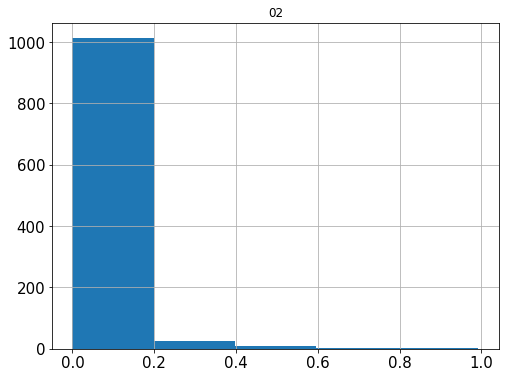

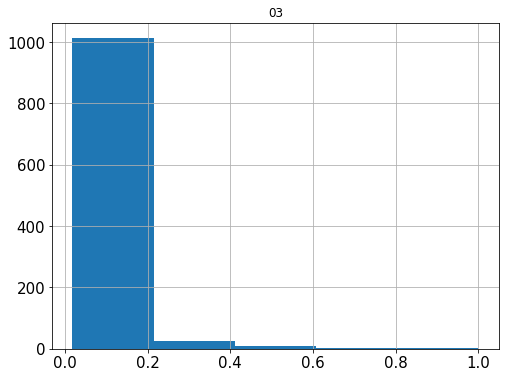

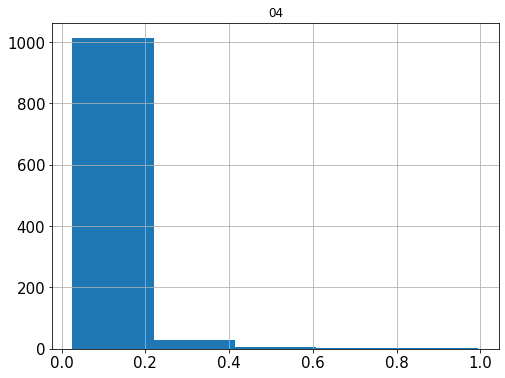

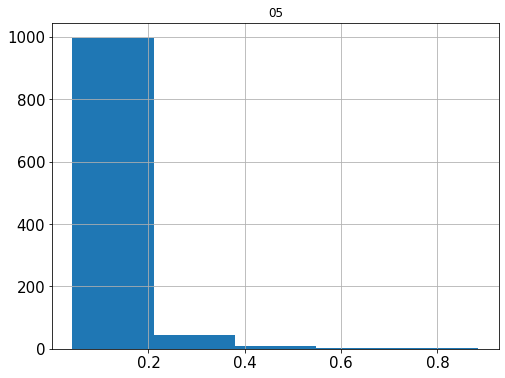

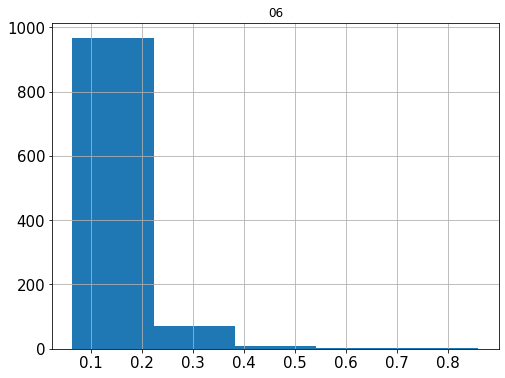

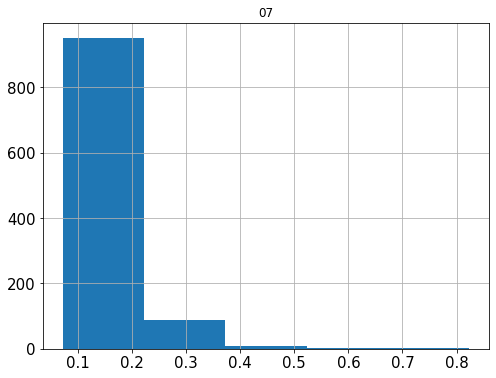

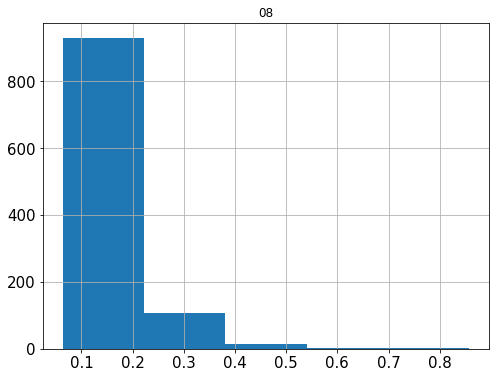

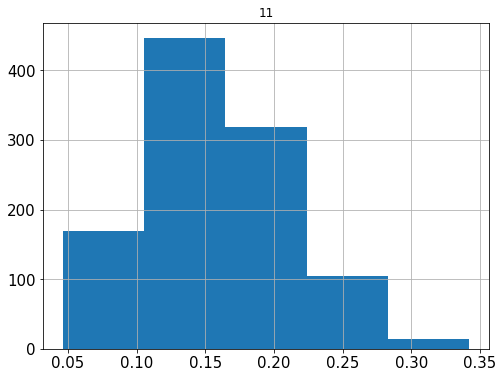

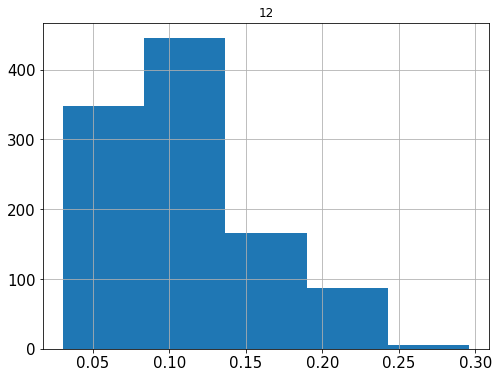

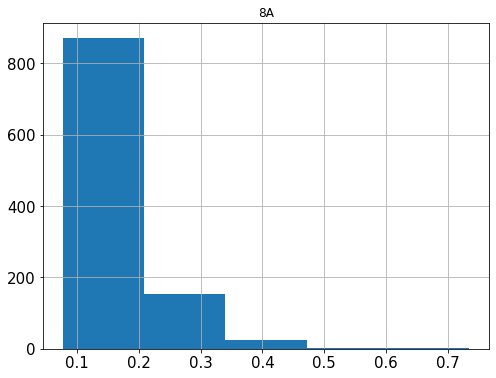

In [8]:
for i in df.columns:
    df.hist(i,bins=5,xlabelsize=15,ylabelsize=15,figsize=(8,6))

### Create polynomial features

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
poly = PolynomialFeatures(2,include_bias=False)

In [11]:
X_poly = poly.fit_transform(X)
str_array = ['02','03','04','05','06','07','08','11','12','8A']
X_poly_feature_name = poly.get_feature_names_out([strval  for strval in str_array])
print(X_poly_feature_name)
print(len(X_poly_feature_name))

['02' '03' '04' '05' '06' '07' '08' '11' '12' '8A' '02^2' '02 03' '02 04'
 '02 05' '02 06' '02 07' '02 08' '02 11' '02 12' '02 8A' '03^2' '03 04'
 '03 05' '03 06' '03 07' '03 08' '03 11' '03 12' '03 8A' '04^2' '04 05'
 '04 06' '04 07' '04 08' '04 11' '04 12' '04 8A' '05^2' '05 06' '05 07'
 '05 08' '05 11' '05 12' '05 8A' '06^2' '06 07' '06 08' '06 11' '06 12'
 '06 8A' '07^2' '07 08' '07 11' '07 12' '07 8A' '08^2' '08 11' '08 12'
 '08 8A' '11^2' '11 12' '11 8A' '12^2' '12 8A' '8A^2']
65


In [12]:
df_poly = pd.DataFrame(X_poly, columns=X_poly_feature_name)
df_poly.head()

,02,03,04,05,06,07,08,11,12,8A,...,08^2,08 11,08 12,08 8A,11^2,11 12,11 8A,12^2,12 8A,8A^2
0,0.068236,0.095857,0.111844,0.145928,0.195592,0.210967,0.216886,0.196000,0.147969,0.220831,...,0.047039,0.042509,0.032092,0.047895,0.038416,0.029002,0.043283,0.021895,0.032676,0.048766
1,0.077284,0.102116,0.126811,0.156541,0.198925,0.212395,0.214981,0.220559,0.177087,0.218110,...,0.046217,0.047416,0.038070,0.046889,0.048646,0.039058,0.048106,0.031360,0.038624,0.047572
2,0.068848,0.101572,0.115450,0.157630,0.228315,0.248452,0.243962,0.211443,0.163889,0.254711,...,0.059518,0.051584,0.039983,0.062140,0.044708,0.034653,0.053857,0.026860,0.041744,0.064878
3,0.065719,0.090346,0.104837,0.139533,0.205184,0.222736,0.203483,0.192462,0.140826,0.231240,...,0.041405,0.039163,0.028656,0.047054,0.037042,0.027104,0.044505,0.019832,0.032565,0.053472
4,0.065175,0.095245,0.115858,0.152459,0.209470,0.223961,0.221648,0.222328,0.166474,0.236070,...,0.049128,0.049279,0.036899,0.052324,0.049430,0.037012,0.052485,0.027714,0.039300,0.055729


In [13]:
df_poly['y']=y
df_poly.head()

,02,03,04,05,06,07,08,11,12,8A,...,08 11,08 12,08 8A,11^2,11 12,11 8A,12^2,12 8A,8A^2,y
0,0.068236,0.095857,0.111844,0.145928,0.195592,0.210967,0.216886,0.196000,0.147969,0.220831,...,0.042509,0.032092,0.047895,0.038416,0.029002,0.043283,0.021895,0.032676,0.048766,0.175745
1,0.077284,0.102116,0.126811,0.156541,0.198925,0.212395,0.214981,0.220559,0.177087,0.218110,...,0.047416,0.038070,0.046889,0.048646,0.039058,0.048106,0.031360,0.038624,0.047572,0.192400
2,0.068848,0.101572,0.115450,0.157630,0.228315,0.248452,0.243962,0.211443,0.163889,0.254711,...,0.051584,0.039983,0.062140,0.044708,0.034653,0.053857,0.026860,0.041744,0.064878,0.144344
3,0.065719,0.090346,0.104837,0.139533,0.205184,0.222736,0.203483,0.192462,0.140826,0.231240,...,0.039163,0.028656,0.047054,0.037042,0.027104,0.044505,0.019832,0.032565,0.053472,0.178272
4,0.065175,0.095245,0.115858,0.152459,0.209470,0.223961,0.221648,0.222328,0.166474,0.236070,...,0.049279,0.036899,0.052324,0.049430,0.037012,0.052485,0.027714,0.039300,0.055729,0.083634


In [14]:
import numpy as np
df_poly.shape

(1051, 66)

In [15]:
X_train=df_poly.drop('y',axis=1)
y_train=df_poly['y']

In [16]:
y_train

0       0.175745
1       0.192400
2       0.144344
3       0.178272
4       0.083634
          ...   
1046    0.134023
1047    0.168973
1048    0.236185
1049    0.212401
1050    0.236185
Name: y, Length: 1051, dtype: float64

### Metamodel (Optislang style :) - polynomial model with cross-validation and LASSO regularization
** This is an advanced machine learning method which prevents over-fitting by penalizing high-valued coefficients i.e. keep them bounded **

In [17]:
from sklearn.linear_model import LassoCV

In [18]:
model1 = LassoCV(cv=10,verbose=0,eps=0.001, n_jobs=3,n_alphas=100, tol=0.0001,max_iter=500000)

In [19]:
model1.fit(X_train,y_train)

LassoCV(cv=10, max_iter=500000, n_jobs=3, verbose=0)

In [20]:
y_pred1 = np.array(model1.predict(X_train))

In [21]:
RMSE_1=np.sqrt(np.sum(np.square(y_pred1-y_train)))
print("Root-mean-square error of Metamodel:",RMSE_1)

Root-mean-square error of Metamodel: 6.768457333268124


In [22]:
coeff1 = pd.DataFrame(model1.coef_,index=df_poly.drop('y',axis=1).columns, columns=['Coefficients Metamodel'])
coeff1

,Coefficients Metamodel
02,-0.0
03,-0.0
04,-0.0
05,-0.0
06,-0.0
...,...
11 12,-0.0
11 8A,-0.0
12^2,-0.0
12 8A,-0.0


In [23]:
model1.score(X_train,y_train)

0.0

In [24]:
model1.alpha_

0.0015479392640383065

### Printing only the non-zero coefficients of the metamodel

In [25]:
coeff1[coeff1['Coefficients Metamodel']!=0]

,Coefficients Metamodel


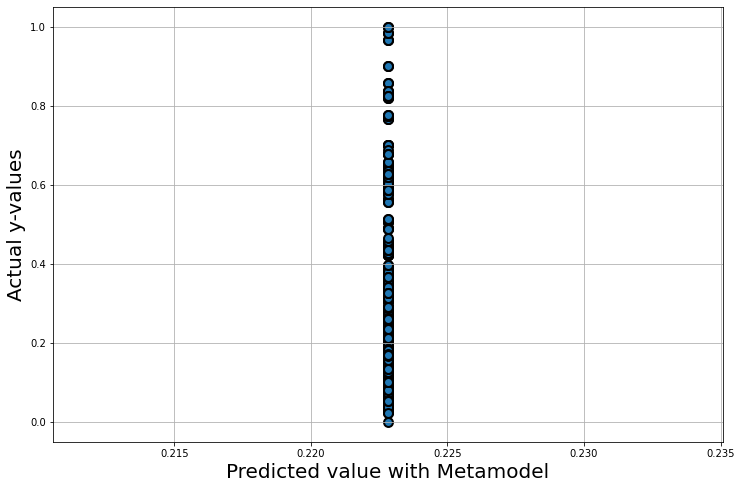

In [26]:
plt.figure(figsize=(12,8))
plt.xlabel("Predicted value with Metamodel",fontsize=20)
plt.ylabel("Actual y-values",fontsize=20)
plt.grid(1)
plt.scatter(y_pred1,y_train,edgecolors=(0,0,0),lw=2,s=80)
plt.plot(y_pred1,y_pred1, 'k--', lw=2)

(2.6602460835823822,
 5.9602460835823825,
 0.0046096087361527215,
 0.11291909987364199)

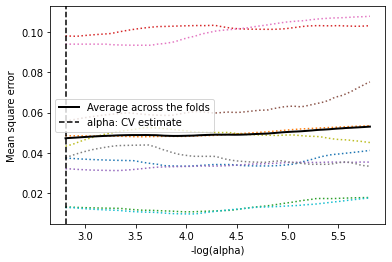

In [27]:
# Display results
m_log_alphas = -np.log10(model1.alphas_)

plt.figure()
ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model1.mse_path_, ':')
plt.plot(m_log_alphas, model1.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model1.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')
plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.axis('tight')